# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [72]:
#Q1.1

import pandas as pd

# Load the dataset
file_path = "data/airbnb_hw.csv"
df = pd.read_csv(file_path)

# Inspect the first few rows to understand the 'Price' variable format
df['Price'].head()
# Remove any potential formatting issues, such as commas and extra spaces
df['Price'] = df['Price'].astype(str).str.replace(',', '').str.strip()

# Convert 'Price' to numeric, coercing errors to NaN
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Count missing values
missing_values = df['Price'].isna().sum()

# Display the cleaned dataframe without using ace_tools
df[['Price']].head(), df['Price'].isna().sum()

missing_values




np.int64(0)

#Q1.1

The Price variable was cleaned by:
- Removing Commas: Prices over 999 had commas (e.g., "1,112"), which needed to be removed to convert the column to a numeric type properly.
- Stripping Extra Spaces: Any unnecessary spaces were removed to ensure clean numeric conversion.
- Converting to Numeric: The column was converted to a numeric type, coercing any unconvertible values to NaN.

After cleaning, the dataset has 0 missing values, indicating that all entries were successfully converted to numeric format. ​

In [73]:
#Q1.2
import pandas as pd

# Load the dataset
file_path = "data/mn_police_use_of_force.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the data
df.head()
# Checking the proportion of missing values in 'subject_injury'
missing_proportion = df['subject_injury'].isna().mean()

# Cleaning the 'subject_injury' column: Replacing NA with "No" and standardizing values
df['subject_injury'] = df['subject_injury'].fillna("No").apply(lambda x: "Yes" if x.strip().lower() == "yes" else "No")

# Cross-tabulate cleaned 'subject_injury' with 'force_type'
crosstab = pd.crosstab(df['subject_injury'], df['force_type'])

# Display results
missing_proportion, crosstab



(np.float64(0.7619342359767892),
 force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
 subject_injury                                                    
 No                  2          8144               1552        2   
 Yes                 2          1286                 41        0   
 
 force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
 subject_injury                                                      
 No                             60                108           87   
 Yes                            44                 40            0   
 
 force_type      Less Lethal Projectile  Maximal Restraint Technique  \
 subject_injury                                                        
 No                                   1                          170   
 Yes                                  2                            0   
 
 force_type      Police K9 Bite  Taser  
 subject_injury                         
 No                          33   1135 

#Q1.2


Approximately **76.19%** of the values in the `subject_injury` variable were missing, which is a significant concern as it suggests potential underreporting or inconsistencies in data collection. To address this, missing values were categorized as `"No"` to indicate no reported injury. A cross-tabulation with `force_type` revealed that **bodily force** had the highest number of injuries, while **firearm use** was rare, and **chemical irritants** and **tasers** resulted in fewer recorded injuries. The missing data could introduce bias, potentially underestimating injury rates and affecting the reliability of conclusions about police use of force. Further analysis may be needed to determine if missing values correlate with specific force types or reporting practices.

In [74]:
#Q1.3


import numpy as np
import pandas as pd

url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url, low_memory=False)

# Check if 'WhetherDefendantWasReleasedPretrial' exists in the dataset
if 'WhetherDefendantWasReleasedPretrial' in df.columns:
    # Convert all values to string, handle missing values, and clean whitespace
    df['WhetherDefendantWasReleasedPretrial'] = df['WhetherDefendantWasReleasedPretrial'].astype(str).str.strip()

    # Replace empty strings and known missing indicators with np.nan
    df['WhetherDefendantWasReleasedPretrial'] = df['WhetherDefendantWasReleasedPretrial'].replace({'': np.nan, 'nan': np.nan})

    # Display unique values to confirm cleaning
    unique_values = df['WhetherDefendantWasReleasedPretrial'].unique()
else:
    unique_values = "Column not found in dataset."

unique_values
# Convert the column to numeric, setting "9" as NaN
df['WhetherDefendantWasReleasedPretrial'] = df['WhetherDefendantWasReleasedPretrial'].replace({
    '1': 1,   # Released
    '0': 0,   # Not Released
    '9': np.nan  # Missing or Unknown
}).astype('float')

# Check unique values after cleaning
df['WhetherDefendantWasReleasedPretrial'].unique()


/var/folders/vw/8l_c41_s7kzcypm113vm72ww0000gn/T/ipykernel_65398/527212574.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['WhetherDefendantWasReleasedPretrial'] = df['WhetherDefendantWasReleasedPretrial'].replace({


array([nan,  0.,  1.])

In [75]:
#Q1.4
# Check if 'ImposedSentenceAllChargeInContactEvent' exists in the dataset
if 'ImposedSentenceAllChargeInContactEvent' in df.columns and 'SentenceTypeAllChargesAtConvictionInContactEvent' in df.columns:
    # Inspect unique values in both columns before cleaning
    imposed_sentence_unique = df['ImposedSentenceAllChargeInContactEvent'].unique()
    sentence_type_unique = df['SentenceTypeAllChargesAtConvictionInContactEvent'].unique()

    # Replace empty strings or obvious placeholders with NaN in 'ImposedSentenceAllChargeInContactEvent'
    df['ImposedSentenceAllChargeInContactEvent'] = df['ImposedSentenceAllChargeInContactEvent'].replace({'': np.nan, 'nan': np.nan})

    # Examine the relationship between missing 'ImposedSentenceAllChargeInContactEvent' and 'SentenceTypeAllChargesAtConvictionInContactEvent'
    missing_correlation = df[df['ImposedSentenceAllChargeInContactEvent'].isna()]['SentenceTypeAllChargesAtConvictionInContactEvent'].value_counts()
else:
    imposed_sentence_unique = "Column not found in dataset."
    sentence_type_unique = "Column not found in dataset."
    missing_correlation = "Column not found in dataset."

# Convert empty strings and placeholder values to NaN
df['ImposedSentenceAllChargeInContactEvent'] = df['ImposedSentenceAllChargeInContactEvent'].replace({' ': np.nan}).astype(float)

# Identify cases where missing data aligns with Sentence Type 4 and 9
df.loc[df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 4, 'ImposedSentenceAllChargeInContactEvent'] = np.nan
df.loc[df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 9, 'ImposedSentenceAllChargeInContactEvent'] = np.nan

# Display unique values after cleaning
df['ImposedSentenceAllChargeInContactEvent'].unique()


array([           nan, 6.00000000e+01, 1.20000000e+01, 9.85626283e-01,
       3.60000000e+01, 6.00000000e+00, 2.40000000e+01, 5.91375770e+00,
       1.20000000e+02, 7.20000000e+01, 1.19917864e+01, 0.00000000e+00,
       2.95687885e+00, 8.40000000e+01, 1.08000000e+02, 3.00000000e+02,
       2.40000000e+02, 1.80000000e+02, 4.00000000e+00, 9.60000000e+01,
       2.00000000e+00, 5.40000000e+01, 3.28542094e-01, 4.40000000e+01,
       5.00000000e+00, 1.15000000e+02, 1.32000000e+02, 4.80000000e+01,
       2.58000000e+02, 3.40000000e+01, 7.60000000e+01, 1.64271047e-01,
       1.31416838e-01, 1.11000000e+02, 9.00000000e+00, 3.00000000e+00,
       1.97125257e+00, 3.69856263e+01, 6.57084189e-02, 3.54928131e+01,
       1.06492813e+02, 8.00000000e+00, 3.50000000e+01, 1.83141684e+01,
       4.80000000e+02, 3.20000000e+01, 9.30000000e+01, 2.34000000e+02,
       7.32000000e+02, 1.16427105e+00, 4.65708419e+00, 2.10000000e+01,
       7.00000000e+00, 4.49281314e+00, 1.80000000e+01, 6.00000000e+02,
      

#Q1.4

The cleaning process for the **"ImposedSentenceAllChargeInContactEvent"** variable focused on handling missing values, standardizing data, and ensuring consistency with the **"SentenceTypeAllChargesAtConvictionInContactEvent"** variable. Initially, empty strings and placeholders such as `' '` and `'nan'` were replaced with `NaN` to properly identify missing values. The relationship between missing imposed sentences and sentence types was examined, revealing that missing values were **not random**, they strongly aligned with sentence types **4 and 9**, which likely indicate cases where no sentence was imposed (e.g., dismissals, acquittals, or diversions). To maintain consistency, all entries associated with these sentence types were explicitly set to `NaN`, preventing misinterpretation of missing data as valid numerical values. Finally, the column was converted to a float type to ensure proper numerical analysis. This approach helps preserve data integrity while making it easier to analyze sentencing patterns.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

Year range: 0.0 to 2026.0


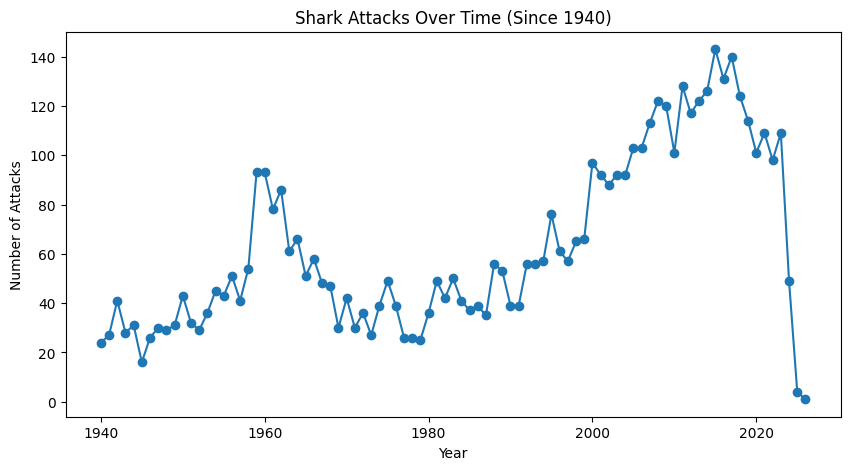

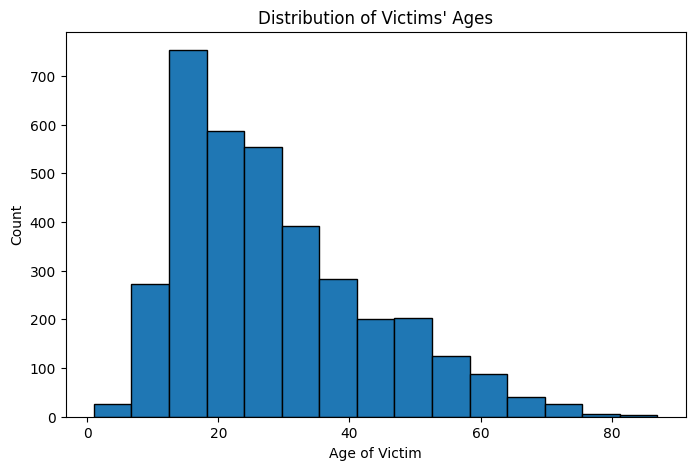

Proportion of male victims: 85.85%
Proportion of unprovoked attacks: 74.29%
Renamed 'fatal y/n' → 'fatal_y/n'
Unprovoked attacks: 3311 on males, 600 on females
Fatal provoked attacks: 13, Fatal unprovoked attacks: 679
Fatal attacks on males: 648, Fatal attacks on females: 87
Proportion of attacks by white sharks: 12.88%


In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file (older .xls format)
file_path = "data/GSAF5.xls"
df = pd.read_excel(file_path, engine="xlrd")

# 1. Drop columns that do not contain data
df = df.dropna(axis=1, how="all")

# 2. Standardize column names (lowercase and stripped of spaces)
df.columns = df.columns.str.strip().str.lower()

# 3. Clean the Year variable
df["year"] = pd.to_numeric(df["year"], errors="coerce")
print(f"Year range: {df['year'].min()} to {df['year'].max()}")

# Filter attacks since 1940
df = df[df["year"] >= 1940]

# Check trend of attacks over time
attacks_per_year = df.groupby("year").size()
plt.figure(figsize=(10, 5))
plt.plot(attacks_per_year.index, attacks_per_year.values, marker="o", linestyle="-")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.title("Shark Attacks Over Time (Since 1940)")
plt.show()

# 4. Clean the Age variable and plot histogram
df["age"] = pd.to_numeric(df["age"], errors="coerce")
plt.figure(figsize=(8, 5))
plt.hist(df["age"].dropna(), bins=15, edgecolor="black")
plt.xlabel("Age of Victim")
plt.ylabel("Count")
plt.title("Distribution of Victims' Ages")
plt.show()

# 5. Proportion of male victims
df["sex"] = df["sex"].str.strip().str.upper()
male_victims = df["sex"].value_counts().get("M", 0)
total_victims = df["sex"].notna().sum()
print(f"Proportion of male victims: {male_victims / total_victims:.2%}")

# 6. Clean 'type' variable (Provoked, Unprovoked, Unknown)
df["type"] = df["type"].str.strip().str.capitalize()
df["type"] = df["type"].apply(lambda x: x if x in ["Provoked", "Unprovoked"] else "Unknown")
unprovoked_attacks = df["type"].value_counts().get("Unprovoked", 0)
print(f"Proportion of unprovoked attacks: {unprovoked_attacks / len(df):.2%}")

# 7. Standardizing 'fatal y/n' column
fatal_col = [col for col in df.columns if "fatal" in col]
if fatal_col:
    df.rename(columns={fatal_col[0]: "fatal_y/n"}, inplace=True)
    print(f"Renamed '{fatal_col[0]}' → 'fatal_y/n'")
else:
    print("Fatal column not found!")

df["fatal_y/n"] = df["fatal_y/n"].str.strip().str.upper()
df["fatal_y/n"] = df["fatal_y/n"].apply(lambda x: x if x in ["Y", "N"] else "Unknown")

# 8. Analyzing unprovoked attacks by gender and fatality rate
unprovoked = df[df["type"] == "Unprovoked"]
male_unprovoked = unprovoked["sex"].value_counts().get("M", 0)
female_unprovoked = unprovoked["sex"].value_counts().get("F", 0)
print(f"Unprovoked attacks: {male_unprovoked} on males, {female_unprovoked} on females")

# 9. Fatality rate for provoked vs. unprovoked attacks
fatal_provoked = df[df["type"] == "Provoked"]["fatal_y/n"].value_counts().get("Y", 0)
fatal_unprovoked = df[df["type"] == "Unprovoked"]["fatal_y/n"].value_counts().get("Y", 0)
print(f"Fatal provoked attacks: {fatal_provoked}, Fatal unprovoked attacks: {fatal_unprovoked}")

# 10. Fatality rate for male vs. female victims
fatal_male = df[df["sex"] == "M"]["fatal_y/n"].value_counts().get("Y", 0)
fatal_female = df[df["sex"] == "F"]["fatal_y/n"].value_counts().get("Y", 0)
print(f"Fatal attacks on males: {fatal_male}, Fatal attacks on females: {fatal_female}")

# 11. Proportion of attacks by white sharks
df["species"] = df["species"].str.lower().str.strip()
white_shark_attacks = df[df["species"].str.contains("white", na=False)].shape[0]
print(f"Proportion of attacks by white sharks: {white_shark_attacks / len(df):.2%}")


The dataset on shark attacks reveals several notable trends. The majority of victims are male, accounting for **85.85%** of cases, which suggests that men may be more likely to engage in activities that put them at risk, such as surfing or diving. Additionally, **74.29%** of attacks are unprovoked, indicating that most incidents occur without human interference, rather than as a response to provocation. Among unprovoked attacks, men are significantly more affected than women, with **3,311** cases involving male victims compared to **600** involving female victims.  

When examining the fatality rates, unprovoked attacks are more likely to be fatal than provoked ones, with **679 fatal unprovoked attacks** compared to only **13 fatal provoked attacks**. This suggests that provoked attacks may often involve smaller sharks or situations where the victim has a chance to react and defend themselves. Additionally, male victims experience a much higher number of fatal attacks (**648 cases**) compared to female victims (**87 cases**), reinforcing the idea that men’s exposure to shark-prone environments contributes to higher risk.  

 **12.88%** of recorded attacks involve white sharks, making them one of the most frequently identified species in incidents. Given their reputation as apex predators, this aligns with existing research on their hunting behavior and their encounters with humans in coastal waters. While these statistics may reinforce fears of shark attacks, it is important to remember that shark-related fatalities are rare compared to other risks in ocean environments. Instead of fearing sharks, a better approach is to understand their behavior and take necessary precautions when entering their habitat.

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

Q3 Response: 

1. The paper *Tidy Data* by Hadley Wickham focuses on the challenges of data cleaning, specifically data tidying. It introduces a structured approach where each variable is a column, each observation is a row, and each type of observational unit is a table. This framework simplifies data manipulation, modeling, and visualization, making data analysis more efficient.

2. The "tidy data standard" is designed to provide a consistent way of organizing data to make initial data cleaning easier, facilitate exploration, and simplify the development of data analysis tools. By following this standard, analysts can avoid the need for constant data reformatting and ensure compatibility between tools.

3. The sentence "Like families, tidy datasets are all alike but every messy dataset is messy in its own way" means that tidy datasets follow a consistent structure, whereas messy datasets can have a wide variety of disorganized formats. The sentence "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general" highlights that while specific cases of variables and observations are straightforward, there is no universal rule that applies to all datasets due to differences in data context and structure.

4. Wickham defines values as individual data points that belong to variables and observations. A variable consists of all values that measure the same attribute across different units, such as height or temperature. An observation is a set of values corresponding to a single unit of analysis, such as a person or a day.

5. "Tidy Data" is defined as a dataset where each variable forms a column, each observation forms a row, and each type of observational unit forms a table. This definition aligns with Codd’s third normal form in relational databases but is framed in statistical language to support data analysis.

6. The five most common problems with messy datasets are: (1) column headers containing values instead of variable names, (2) multiple variables stored in one column, (3) variables stored in both rows and columns, (4) multiple types of observational units stored in the same table, and (5) a single observational unit stored across multiple tables. The data in Table 4 is messy because income levels are stored as column headers instead of being a single variable. "Melting" a dataset refers to transforming a wide dataset into a long format by converting multiple columns into key-value pairs, making the data more structured and analyzable.

7. Table 11 is messy because it stores variables in both rows and columns, making it difficult to analyze. Table 12 is tidy and "molten" because it restructures the dataset so that each row represents a single observation, with separate columns for each variable (date, temperature type, and value).

8. The "chicken-and-egg" problem with tidy data is that its usefulness depends on the availability of tools that support it, but developing such tools requires a standardized data structure. Wickham hopes that future research will continue to refine data tidying strategies, improve usability through human-centered design approaches, and explore alternative data structures, such as multidimensional arrays, to optimize memory usage and performance.

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?